# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


In [33]:
import numpy as np
import random as rd

# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.

Réponse : 

Soit i un entier naturel non nul. 
On utilise la formule de l'espérance dans le cas discret : 

$$
\mathbb{E}(X_i) = \mathbb{P}(X_i=1)-\mathbb{P}(X_i=1) = 0.
$$

Nous allons maintenant calculer $\mathbb{E}(X_i^2)$ pour accéder à la variance.

$$
\mathbb{E}(X_i^2) =  \mathbb{P}(X_i=1)+\mathbb{P}(X_i=1) = 1
$$

De sorte que 

$$
\mathbb{V}(X_i) = \mathbb{E}(X_i^2) - \mathbb{E}(X_i)^2 = 1
$$

Nous avons à faire à une suite de variables alératoires centrées réduites.



2. En déduire l'espérance et la variance de $Y_n$.

Réponse : 
Soit n un entier naturel.
On utilise la linéarité de l'espérance : 

$$
\mathbb{E}(Y_n) =  \mathbb{E}(\sum_{i=1}^{n} X_i) = \sum_{i=1}^{n} \mathbb{E}(X_i) = \sum_{i=1}^{n}0 = 0
$$

Par indépendance des termes de la suite $(X_i)_{i\in \mathbb{N}^\ast}$, on peut calculer la variance de $Y_n$ ainsi :

$$
\mathbb{V}(Y_n) =  \mathbb{V}(\sum_{i=1}^{n} X_i) = \sum_{i=1}^{n} \mathbb{V}(X_i) = \sum_{i=1}^{n}1 = n
$$


3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.

Réponse : 
Soit n un entier naturel non nul.
Soit $y_n$ un entier relatif. 

On remarque d'abord que $\mathbb{P}(Y_n= y_n|Y_{n-1} = y_{n-1}) =\mathbb{P}(X_n = y_n - y_{n-1})$. En effet, une fois la valeur de $$Y_{n-1}=\sum_{i=1}^{n-1}X_i$$ fixée, la probabilité d'avoir une certaine valeur de $$Y_n=\sum_{i=1}^{n}X_i$$ dépend directement uniquement de la valeur du dernier terme de la somme.
Avec la même remarque consistant à dire que donner la valeur de $$Y_n=\sum_{i=1}^{n}X_i$$ est une information suffisante pour connaître la probabilité d'obtention d'une certaine valeur de $$Y_n=\sum_{i=1}^{n}X_i$$, on déduit directement la proposition.

4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left(Y_n-Y_{n+h}\right)^2 = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.

Réponse :
Il est équivalent de montrer que pour tout $(n,h)$ couple d'enntiers naturels, on a  $\mathrm{Cov}(Y_n,Y_{n+h}) = n$. Nous démontrer cette propriété par récurrence sur h, à n fixé quelconque.

Initialisation : le cas h = 0 est vérifié car on a bien $\mathrm{Cov}(Y_n,Y_{n})=\mathbb{V}(Y_n) = n$.

Hérédité : soit h un entier naturel tel qu'on ait $\mathrm{Cov}(Y_n,Y_{n+h}) = n$, montrons que $\mathrm{Cov}(Y_n,Y_{n+h+1}) = n$.
On a, en utilisant notamment la linéarité à droite de la covariance et l'hypothèse de récurrence : 

$$
\mathrm{Cov}(Y_n,Y_{n+h+1}) = \mathrm{Cov}(Y_n,Y_{n+h}+X_{n+h+1}) = \mathrm{Cov}(Y_n,Y_{n+h})+\mathrm{Cov}(Y_n,X_{n+h+1}) = n + \mathrm{Cov}(Y_n,X_{n+h+1})
$$

Par ailleurs, par indépendance des termes de la suite  $(X_i)_{i\in \mathbb{N}^\ast}$, puisque $Y_n$ est une fonction des $X_i$ pour i allant de 1 à $n$, et que $n+h+1$ est strictement surpérieur à $n$, on $Y_n$ qui est indépendant de $X_{n+h+1}$ et donc $\mathrm{Cov}(Y_n,X_{n+h+1}) = 0$.

On a donc bien $\mathrm{Cov}(Y_n,Y_{n+h+1}) = n$ ce qui termine la récurrence et permet de conclure la première partie de la question. 

Par ailleurs, en utilisant la linéarité de l'espérance, 

$$
\mathbb{E}((Y_n-Y_{n+h})^2) = \mathbb{E}(Y_n^2) - 2\mathbb{E}(Y_{n+h}Y_{n}) + \mathbb{E}(Y_{n+h}^2)
= \mathbb{V}(Y_n) + \mathbb{E}(Y_n)^2 - 2(\mathrm{Cov}(Y_{n+h},Y_{n})+ \mathbb{E}(Y_{n+h})\mathbb{E}(Y_{n}))+ \mathbb{V}(Y_{n+h}) + \mathbb{E}(Y_{n+h})^2 
= n + 0 - 2 (n + 0^2) + (n+h) + 0 
= h
$$

5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$

Réponse :
On remarque d'abord que $Y_n$ est une somme de variables indépendantes identiquement distribuées de $L^2$. Le théorème centrale limite permet donc, puisque les variables de la suite  $(X_i)_{i\in \mathbb{N}^\ast}$ sont centrées réduites, de conclure directement :
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$

In [2]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

Montrons que l'on a bien une partition. On note, pour $i$ un entier naturel compris entre 0 et $n$ : $A_i = (t_i,t_{i+1}]$.
- Aucun des éléments de la famille $(A_i)$ n'est l'ensemble vide car on a toujours $t_i<t_{i+1}$
- On remarque aussi que la famille des $(A_i)$ est bien une famille d'ensemble disjoints deux à deux
- Enfin, on remarque (par récurrence par exemple) que pour k un entier naturel inférieur ou égal à n-1, $ \bigcup_{i=0}^{k}(t_i,t_{i+1}] = (0, \frac{k+1}{n}] $, et donc on trouve, pour k = n-1 $ \bigcup_{i=0}^{n-1}(t_i,t_{i+1}] = (0, \frac{n}{n}] = (0, 1]$ ce qui permet de conclure.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

Soit n un entier naturel et t un réel de [0,1].
Puisque $[nt]$ est entier, par définition : $[[nt]] = [nt]$.
De sorte que : 
$$
Z^{(n)}_{t_i} = \frac{Y_{[nt_i]}}{\sqrt{n}} 
= \frac{Y_{[n\frac{[nt]}{n}]}}{\sqrt{n}} 
= \frac{Y_{[[nt]]}}{\sqrt{n}} 
= \frac{Y_{[nt]}}{\sqrt{n}} 
= Z^{(n)}_t
$$
 

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.

In [6]:
n = 1000 
Y = 0 # somme des déplacements
parcours = [] # liste des positions occupées à chaque étape

for k in range(n+1):

    X_k = np.random.binomial(1,0.5)# on fait appel à une loi de Bernouilli pour simuler X_k
    
    if X_k == 0: # déplacement vers le bas
        Y = Y - 1
        
    else:
        Y = Y + 1 # déplacement vers le haut
        
    parcours.append(Y) # on ajoute la nouvelle position à l'historique

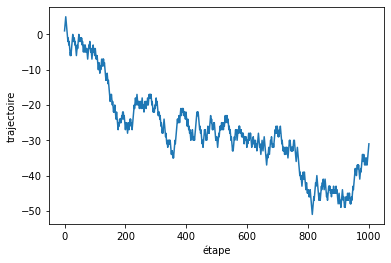

In [7]:
#Tracé 

plt.plot(range(n+1),parcours)
plt.xlabel('étape')
plt.ylabel('trajectoire')
plt.show()

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



In [30]:
#construction échantillon
échantillon = []
n = 1000 
taille_éch = 1000
Y = 0 # somme des déplacements

for m in range(taille_éch):
    
    for k in range(n+1):

        X_k = np.random.binomial(1,0.5)#on fait appel à une loi de Bernouilli
    
        if X_k == 0: # déplacement vers le bas
            Y = Y -1
        
        else:
            Y = Y + 1 # déplacement vers le haut
        
    échantillon.append(Y/np.sqrt(n))

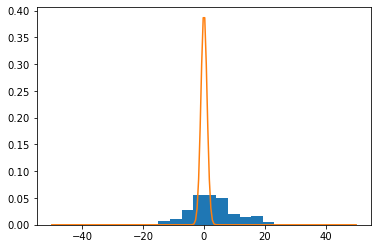

In [31]:
plt.hist(échantillon, density = True)
X = np.linspace(-50,50,200)
plt.plot(X,[np.exp(-x**2/2)/(np.sqrt(np.pi*2)) for x in X])

Soit t un réel de [0,1]. Montrons $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t)$.
On sait que si $(X_n)$ est une suite de variable aléatoire convergeant en loi vers une loi normale centrée réduite, et $(a_n)$ une suite de réels convergeant vers a, alors $(a_nX_n)$ converge en loi vers une loi normale centrée d'écart-type a.
On sait d'après la partie précédente que 
  $$\frac{Y_{[nt]}}{\sqrt{[nt]}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$
Or :
$$
Z^{(n)}_t = \frac{Y_{[nt]}}{\sqrt{n}} = \frac{Y_{[nt]}}{\sqrt{[nt]}}\sqrt{\frac{[nt]}{{n}}}
$$
Mais par ailleurs, on sait que [x] et x sont équivalents en plus infini (cela se prouve en montrant que le quotient $\frac{x}{[x]}$ tend vers 1 quand $x$ tend vers plus l'infini grâce à l'encadrement $[x]\leq x \le [x]+1$). 
On déduit alors que $\sqrt{\frac{[nt]}{{n}}}$ tend vers $t$ quand n tend vers +infini.
On se trouve alors dans le cas explicité au début avec $X_n = \frac{Y_{[nt]}}{\sqrt{[nt]}}$ et $a_n = \sqrt{\frac{[nt]}{{n}}}$ tendant vers $a = t$.
On déduit donc le résultat.

Démonstration du résultat annoncé plus haut. Soit (Xn) convergeant en loivers une loi normale centrée réduite et an tendant vers a.
On sait que la convergence en loi équivaut à la convergence simple des fonctions de partitions c'est-à-dire qu'on a ici, en notant $F_n$ la fonction de partition de $X_n$, pour x réel quelconque :
$$ 
\lim_{n \to +\infty} F_n(x) = 	\int_{-inf}^x \frac{exp(-t^2)}{\sqrt{2\pi}}dt = F(x)
$$
Par ailleurs, pour n un entier naturel et x un réel :
$$
\mathbb{P}(a_nX_n\leq x) = \mathbb{P}(X_n\leq  \frac{x}{a_n}) = F_n(\frac{x}{a_n})
$$
On a convergence simple de $F_n$ vers $F$ et convergence simple de la suite de fonction définie par $f_n(x) = \frac{x}{a_n}$ vers f définie par $f(x) = \frac{x}{a}$.


**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

3. Montrer que $\frac12\mathbb{E}\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2 = h$ pour $h>0$ et tel que $t+h \leq 1$.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?